In [ ]:
import time
import numpy as np

def enhanced_shifted_qr_algorithm(A, max_iterations=100, tol=1e-6, deflation_tol=1e-10):
    n = A.shape[0]
    Ak = np.copy(A)
    eigenvalues = []
    for i in range(max_iterations):
        for j in range(n - 1, 0, -1):
            if np.linalg.norm(Ak[j, :j]) < deflation_tol:
                print(f"Deflating at index {j} with eigenvalue: {Ak[j, j]}")
                eigenvalues.append(Ak[j, j])
                Ak = Ak[:j, :j]
                n = j
                break
        if n == 1:
            eigenvalues.append(Ak[0, 0])
            print(f"Final eigenvalue: {Ak[0, 0]}")
            break
        if n >= 2:
            a = Ak[-2, -2]
            b = Ak[-2, -1]
            c = Ak[-1, -2]
            d = Ak[-1, -1]
            trace = a + d
            det = a * d - b * c
            delta = np.sqrt(trace**2 - 4 * det)
            mu1 = (trace + delta) / 2
            mu2 = (trace - delta) / 2
            mu = mu1 if abs(mu1 - d) < abs(mu2 - d) else mu2
        else:
            mu = Ak[-1, -1]
        shifted_A = Ak - mu * np.eye(n)
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(n)
        off_diagonal_norm = np.sqrt(np.sum(np.tril(Ak, -1)**2))
        print(f"Iteration {i + 1}: Off-diagonal norm = {off_diagonal_norm}")
        if off_diagonal_norm < tol:
            print(f"Converged after {i + 1} iterations.")
            eigenvalues.extend(np.diag(Ak))
            break
    return np.array(eigenvalues)


if __name__ == "__main__":
    start_time = time.time()
    n = int(input("Enter the dimension of the matrix: "))
    while True:
        A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
        if not np.allclose(A, A.conj().T, atol=1e-8): #check the non hermition thing (A conj Transpose equal)
            break
        else:
            print("Generated matrix was Hermitian. Regenerating a random matrix...")
    print("\nRandomly generated non-Hermitian matrix A:")
    print(A)
    eigenvalues_qr = enhanced_shifted_qr_algorithm(A)
    print("\nComputed Eigenvalues using enhanced shifted QR algorithm:")
    print(eigenvalues_qr)
    eigenvalues_np, _ = np.linalg.eig(A)
    print("\nOriginal Eigenvalues")
    print(eigenvalues_np)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000
    print(f"\nExecution time: {execution_time:.2f} ms")


Enter the dimension of the matrix: 3

Randomly generated non-Hermitian matrix A:
[[0.78406396+0.08418744j 0.34702422+0.06957707j 0.11590637+0.03890964j]
 [0.33447146+0.88643449j 0.2673307 +0.88481627j 0.37768878+0.59731068j]
 [0.17642709+0.19134828j 0.63374062+0.45341046j 0.22855544+0.83303737j]]
Iteration 1: Off-diagonal norm = (0.24296776801922917+0.599791133284375j)
Iteration 2: Off-diagonal norm = (0.12345991079585708+0.31542842432170864j)
Iteration 3: Off-diagonal norm = (0.06666271022789313+0.17015057188722113j)
Iteration 4: Off-diagonal norm = (0.03605028505861749+0.09201511833955509j)
Deflating at index 2 with eigenvalue: (-0.24429327080502172+0.23887221725562072j)
Iteration 5: Off-diagonal norm = (1.2286147631604252e-18+3.1359289570695683e-18j)
Converged after 5 iterations.

Computed Eigenvalues using enhanced shifted QR algorithm:
[-0.24429327+0.23887222j  0.98725078+1.38055002j  0.53699259+0.18261885j]

Original Eigenvalues
[ 0.98725078+1.38055002j  0.53699259+0.18261885j -0

Enter the dimension of the matrix: 50

Randomly generated non-Hermitian matrix A:
[[0.92716387+0.85059199j 0.4025978 +0.08077719j 0.47436622+0.61560889j
  ... 0.98919744+0.37110086j 0.28038389+0.78402478j
  0.14088542+0.45903787j]
 [0.17643325+0.69527075j 0.77665777+0.32793045j 0.41077882+0.42134945j
  ... 0.13816944+0.7859401j  0.78963743+0.97990474j
  0.49057467+0.88841486j]
 [0.88078141+0.75926046j 0.88693497+0.73470913j 0.84318439+0.8417098j
  ... 0.15026974+0.65474558j 0.67847324+0.60096625j
  0.89378287+0.86071666j]
 ...
 [0.55494075+0.66415696j 0.96080617+0.5587755j  0.6851985 +0.23210781j
  ... 0.59208806+0.76665652j 0.16928859+0.93007208j
  0.34382972+0.97114974j]
 [0.17480318+0.18547861j 0.92918758+0.73621299j 0.20353612+0.99287827j
  ... 0.53784881+0.86861493j 0.26549642+0.70467558j
  0.64314282+0.62913126j]
 [0.21310348+0.87031467j 0.81026855+0.3571816j  0.78939719+0.85631483j
  ... 0.85045731+0.67498402j 0.0140461 +0.70224527j
  0.06073658+0.9259347j ]]
Enhanced QR: Iterat

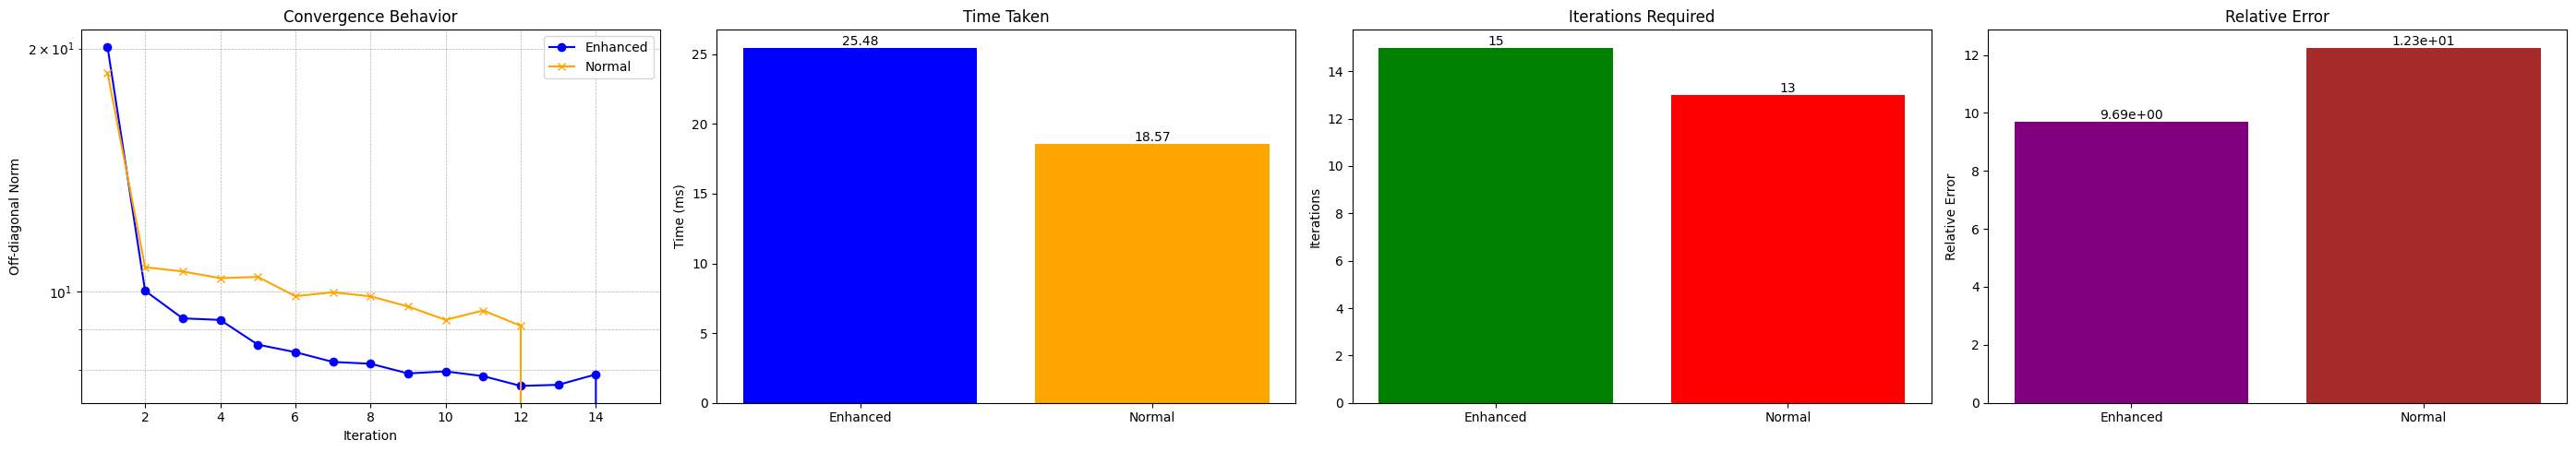

In [ ]:
#!/usr/bin/env python3
import time
import numpy as np
import matplotlib.pyplot as plt

def enhanced_shifted_qr_algorithm(A, max_iterations=1000, tol=1e-6, deflation_tol=1e-10):
    """
    Enhanced shifted QR algorithm with deflation and 2x2 submatrix shifts.

    Returns:
        eigenvalues: Computed eigenvalues (full set).
        iterations: Total number of iterations performed.
        off_diagonals: List of off-diagonal norms per iteration.
    """
    original_n = A.shape[0]
    n = original_n
    Ak = np.copy(A)
    eigenvalues = []
    off_diagonals = []
    iterations = 0

    for it in range(max_iterations):
        iterations += 1

        # Check for deflation: if subdiagonal entries are negligible, decouple that eigenvalue.
        for j in range(n - 1, 0, -1):
            if np.linalg.norm(Ak[j, :j]) < deflation_tol:
                print(f"Enhanced QR: Deflating at index {j} with eigenvalue: {Ak[j, j]}")
                eigenvalues.append(Ak[j, j])
                Ak = Ak[:j, :j]
                n = j
                break

        if n == 1:
            eigenvalues.append(Ak[0, 0])
            off_diagonals.append(0)
            break

        # Compute the shift using the bottom-right 2x2 block.
        if n >= 2:
            a = Ak[-2, -2]
            b = Ak[-2, -1]
            c = Ak[-1, -2]
            d = Ak[-1, -1]
            trace = a + d
            det = a * d - b * c
            delta = np.sqrt(trace**2 - 4 * det)  # may be complex
            mu1 = (trace + delta) / 2
            mu2 = (trace - delta) / 2
            mu = mu1 if abs(mu1 - d) < abs(mu2 - d) else mu2
        else:
            mu = Ak[-1, -1]

        # Perform the shifted QR step.
        shifted_A = Ak - mu * np.eye(n)
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(n)

        # Compute the off-diagonal norm (Frobenius norm of strictly lower triangle).
        off_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diagonals.append(off_norm)
        print(f"Enhanced QR: Iteration {iterations}, Off-diagonal norm = {off_norm:e}")

        if off_norm < tol:
            print(f"Enhanced QR: Converged after {iterations} iterations.")
            eigenvalues.extend(np.diag(Ak))
            break

    if len(eigenvalues) < original_n:
        eigenvalues.extend(np.diag(Ak))

    return np.array(eigenvalues), iterations, off_diagonals


def normal_qr_algorithm(A, max_iterations=1000, tol=1e-6, deflation_tol=1e-10):
    """
    Standard (unshifted) QR algorithm with deflation.

    Returns:
        eigenvalues: Computed eigenvalues (full set).
        iterations: Total number of iterations performed.
        off_diagonals: List of off-diagonal norms per iteration.
    """
    original_n = A.shape[0]
    n = original_n
    Ak = np.copy(A)
    eigenvalues = []
    off_diagonals = []
    iterations = 0

    for it in range(max_iterations):
        iterations += 1

        for j in range(n - 1, 0, -1):
            if np.linalg.norm(Ak[j, :j]) < deflation_tol:
                print(f"Normal QR: Deflating at index {j} with eigenvalue: {Ak[j, j]}")
                eigenvalues.append(Ak[j, j])
                Ak = Ak[:j, :j]
                n = j
                break

        if n == 1:
            eigenvalues.append(Ak[0, 0])
            off_diagonals.append(0)
            break

        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q

        off_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diagonals.append(off_norm)
        print(f"Normal QR: Iteration {iterations}, Off-diagonal norm = {off_norm:e}")

        if off_norm < tol:
            print(f"Normal QR: Converged after {iterations} iterations.")
            eigenvalues.extend(np.diag(Ak))
            break

    if len(eigenvalues) < original_n:
        eigenvalues.extend(np.diag(Ak))

    return np.array(eigenvalues), iterations, off_diagonals


def compute_relative_error(comp_eigs, true_eigs):
    """
    Compute the relative error between computed and true eigenvalues.
    Sorting the arrays helps mitigate ordering issues.
    """
    comp_sorted = np.sort_complex(comp_eigs)
    true_sorted = np.sort_complex(true_eigs)
    if comp_sorted.shape[0] != true_sorted.shape[0]:
        print("Warning: Computed and true eigenvalue counts do not match. Matching over the minimum count.")
        min_len = min(comp_sorted.shape[0], true_sorted.shape[0])
        error = np.linalg.norm(comp_sorted[:min_len] - true_sorted[:min_len]) / np.linalg.norm(true_sorted[:min_len])
    else:
        error = np.linalg.norm(comp_sorted - true_sorted) / np.linalg.norm(true_sorted)
    return error


def main():
    # --- Matrix Generation ---
    n = int(input("Enter the dimension of the matrix: "))
    while True:
        A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
        if not np.allclose(A, A.conj().T, atol=1e-10):
            break
        else:
            print("Generated matrix was Hermitian. Regenerating a random non-Hermitian matrix...")

    print("\nRandomly generated non-Hermitian matrix A:")
    print(A)

    # --- Ground-truth Eigenvalues ---
    true_eigenvalues = np.linalg.eigvals(A)

    # --- Enhanced Shifted QR Algorithm ---
    start_time = time.time()
    eigs_enh, iter_enh, off_diag_enh = enhanced_shifted_qr_algorithm(A)
    time_enh = (time.time() - start_time) * 1000  # in milliseconds
    error_enh = compute_relative_error(eigs_enh, true_eigenvalues)

    # --- Normal (Unshifted) QR Algorithm ---
    start_time = time.time()
    eigs_norm, iter_norm, off_diag_norm = normal_qr_algorithm(A)
    time_norm = (time.time() - start_time) * 1000  # in milliseconds
    error_norm = compute_relative_error(eigs_norm, true_eigenvalues)

    # --- Print Performance Metrics as a Side-by-Side Table ---


    print("\n--- Performance Metrics ---")
    print("Dimension :" , n )
    header = f"{'Algorithm':<30}{'Iterations':<15}{'Time (ms)':<15}{'Relative Error':<20}"
    print(header)
    print("-" * len(header))
    print(f"{'Enhanced Shifted QR':<30}{iter_enh:<15}{time_enh:<15.2f}{error_enh:<20.2e}")
    print(f"{'Normal (Unshifted) QR':<30}{iter_norm:<15}{time_norm:<15.2f}{error_norm:<20.2e}")

    print("\nComputed Eigenvalues:")
    print(f"{'Enhanced Shifted QR':<30}{str(np.sort_complex(eigs_enh))}")
    print(f"{'Normal (Unshifted) QR':<30}{str(np.sort_complex(eigs_norm))}")

    print("\nGround-truth Eigenvalues (np.linalg.eig):")
    print(np.sort_complex(true_eigenvalues))

    # --- Create a Single Figure with 4 Subplots in One Row ---
    fig, axs = plt.subplots(1, 4, figsize=(28, 5))

    # Panel 1: Convergence Behavior (off-diagonal norm vs. iteration)
    ax = axs[0]
    ax.semilogy(range(1, len(off_diag_enh) + 1), off_diag_enh,
                marker='o', color='blue', label='Enhanced')
    ax.semilogy(range(1, len(off_diag_norm) + 1), off_diag_norm,
                marker='x', color='orange', label='Normal')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Off-diagonal Norm')
    ax.set_title('Convergence Behavior')
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Panel 2: Time Taken Comparison (bar chart)
    ax = axs[1]
    algorithms = ['Enhanced', 'Normal']
    times = [time_enh, time_norm]
    bars = ax.bar(algorithms, times, color=['blue', 'orange'])
    ax.set_ylabel('Time (ms)')
    ax.set_title('Time Taken')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.2f}', ha='center', va='bottom')

    # Panel 3: Iterations Comparison (bar chart)
    ax = axs[2]
    iterations_list = [iter_enh, iter_norm]
    bars = ax.bar(algorithms, iterations_list, color=['green', 'red'])
    ax.set_ylabel('Iterations')
    ax.set_title('Iterations Required')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}', ha='center', va='bottom')

    # Panel 4: Relative Error Comparison (bar chart)
    ax = axs[3]
    errors = [error_enh, error_norm]
    bars = ax.bar(algorithms, errors, color=['purple', 'brown'])
    ax.set_ylabel('Relative Error')
    ax.set_title('Relative Error')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.2e}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
